In [208]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [209]:
# get datasets
customer = pd.read_csv('Customer_information.csv', sep=',')

In [210]:
# specify feature names & target names
x=customer[["Age","Annual Income (k$)","Spending Score (1-100)","educational-num",
        "hours-per-week","Mortgage"]]
y=customer["Recommended risk level"]

In [211]:
x.head()

,Age,Annual Income (k$),Spending Score (1-100),educational-num,hours-per-week,Mortgage
0,19,15,39,7,40,134
1,21,15,81,9,50,0
2,20,16,6,12,40,0
3,23,16,77,10,40,0
4,31,17,40,10,30,412


In [212]:
y.head()

0    A
1    A
2    A
3    A
4    A
Name: Recommended risk level, dtype: object

In [213]:
# turn the datasets to dictionary type
x.to_dict(orient="records")

[{'Age': 19,
  'Annual Income (k$)': 15,
  'Spending Score (1-100)': 39,
  'educational-num': 7,
  'hours-per-week': 40,
  'Mortgage': 134},
 {'Age': 21,
  'Annual Income (k$)': 15,
  'Spending Score (1-100)': 81,
  'educational-num': 9,
  'hours-per-week': 50,
  'Mortgage': 0},
 {'Age': 20,
  'Annual Income (k$)': 16,
  'Spending Score (1-100)': 6,
  'educational-num': 12,
  'hours-per-week': 40,
  'Mortgage': 0},
 {'Age': 23,
  'Annual Income (k$)': 16,
  'Spending Score (1-100)': 77,
  'educational-num': 10,
  'hours-per-week': 40,
  'Mortgage': 0},
 {'Age': 31,
  'Annual Income (k$)': 17,
  'Spending Score (1-100)': 40,
  'educational-num': 10,
  'hours-per-week': 30,
  'Mortgage': 412},
 {'Age': 22,
  'Annual Income (k$)': 17,
  'Spending Score (1-100)': 76,
  'educational-num': 6,
  'hours-per-week': 30,
  'Mortgage': 211},
 {'Age': 35,
  'Annual Income (k$)': 18,
  'Spending Score (1-100)': 6,
  'educational-num': 9,
  'hours-per-week': 40,
  'Mortgage': 240},
 {'Age': 23,
  'An

In [214]:
from sklearn.model_selection import train_test_split
# split the datasets with a 8:2 train test ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [215]:
from sklearn.feature_extraction import DictVectorizer
# instantiate a converter class
transfer = DictVectorizer(sparse=True)  # sparse matrix

# use fit_transform
x_train = transfer.fit_transform(x_train.to_dict(orient="records"))
x_test = transfer.fit_transform(x_test.to_dict(orient="records"))

In [216]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
# here we will train the model using the default parameter to see the accuracy which is max_depth=5
# decision tree estimator
estimator=DecisionTreeClassifier(criterion="entropy",max_depth=5,random_state=42)
estimator.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [217]:
# Model evaluation
# method 1：Directly compare the actual value with the predicted value
y_predict=estimator.predict(x_test)
print("y_predict:\n",y_predict,'\n\n')
print("Directly compare the actual value with the predicted value:\n",y_test==y_predict)#boolean
print("\n----------------------\n")

y_predict:
 ['A' 'C' 'B' 'B' 'B' 'C' 'C' 'D' 'D' 'C' 'C' 'D' 'D' 'C' 'E' 'D' 'C' 'B'
 'A' 'C' 'B' 'A' 'C' 'C' 'C' 'B' 'C' 'B' 'C' 'A' 'C' 'A' 'C' 'C' 'C' 'C'
 'C' 'C' 'D' 'A'] 


Directly compare the actual value with the predicted value:
 95      True
15      True
30      True
158     True
128    False
115    False
69      True
170     True
174     True
45      True
66      True
182     True
165     True
78      True
186    False
177     True
56      True
152     True
82      True
68     False
124    False
16     False
148     True
93      True
65     False
60      True
84      True
67      True
125     True
132     True
9      False
18     False
55      True
75      True
150    False
104     True
135     True
137     True
164     True
76      True
Name: Recommended risk level, dtype: bool

----------------------



In [218]:
# method 2：Accuracy of calculation
score=estimator.score(x_test,y_test)
print("Accuracy：\n",score,'\n\n')
print("Confusion Matrix: \n",confusion_matrix(y_test, y_predict),'\n\n')
print("Classification Report: \n",classification_report(y_test, y_predict),'\n')

Accuracy：
 0.75 


Confusion Matrix: 
 [[ 4  1  0  0  0]
 [ 2  5  4  0  0]
 [ 0  1 15  0  0]
 [ 0  0  1  6  1]
 [ 0  0  0  0  0]] 


Classification Report: 
               precision    recall  f1-score   support

           A       0.67      0.80      0.73         5
           B       0.71      0.45      0.56        11
           C       0.75      0.94      0.83        16
           D       1.00      0.75      0.86         8
           E       0.00      0.00      0.00         0

    accuracy                           0.75        40
   macro avg       0.63      0.59      0.59        40
weighted avg       0.78      0.75      0.75        40
 



In [219]:
# Decision tree visualization before finding the optimal model
# Please see the frog_tree.dot file attached within this code
# the dot file has been manually converted to png file
export_graphviz(estimator,out_file="tree1.dot",feature_names=transfer.feature_names_)

In [220]:
# Search for the optimal model in a range 5 to 20
dt_models = []
depths = np.arange(5,20,1)
for d in depths:
        model = DecisionTreeClassifier(criterion="entropy",random_state=42, max_depth=d)
        model.fit(x_train, y_train)
        dt_models.append(model)

In [221]:
# Here we build different models using cross validation
best_acc = 0
model_best = None
for m,d in zip(dt_models, depths):
        acc = m.score(x_test, y_test)
        print(f'Decision Tree classifier with max_depth = {d} achieves a mean accuracy of {acc}')
        if acc > best_acc:
                best_acc = acc
                model_best = m

print('\n', "Best accuracy: ", best_acc)
print('\n', "Best model: ",model_best)
# Here as we can see from the result the highest accuracy achieved is from max_depth = 11

Decision Tree classifier with max_depth = 5 achieves a mean accuracy of 0.75
Decision Tree classifier with max_depth = 6 achieves a mean accuracy of 0.775
Decision Tree classifier with max_depth = 7 achieves a mean accuracy of 0.75
Decision Tree classifier with max_depth = 8 achieves a mean accuracy of 0.775
Decision Tree classifier with max_depth = 9 achieves a mean accuracy of 0.75
Decision Tree classifier with max_depth = 10 achieves a mean accuracy of 0.775
Decision Tree classifier with max_depth = 11 achieves a mean accuracy of 0.775
Decision Tree classifier with max_depth = 12 achieves a mean accuracy of 0.775
Decision Tree classifier with max_depth = 13 achieves a mean accuracy of 0.775
Decision Tree classifier with max_depth = 14 achieves a mean accuracy of 0.775
Decision Tree classifier with max_depth = 15 achieves a mean accuracy of 0.775
Decision Tree classifier with max_depth = 16 achieves a mean accuracy of 0.775
Decision Tree classifier with max_depth = 17 achieves a mean

In [222]:
# Here we'll use the highest max_depth possible to reach the highest accuracy which is max_depth = 11
y_pred = model_best.predict(x_test)
print("Accuracy：\n",accuracy_score(y_test,y_pred),'\n\n')
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred),'\n\n')
print("Classification Report: \n",classification_report(y_test, y_pred),'\n')

# Decision tree visualization with depth=11
# the dot file has been manually converted to png file
export_graphviz(model,out_file="tree2.dot",feature_names=transfer.feature_names_)

Accuracy：
 0.775 


Confusion Matrix: 
 [[ 5  0  0  0  0]
 [ 2  5  4  0  0]
 [ 0  1 15  0  0]
 [ 0  0  1  6  1]
 [ 0  0  0  0  0]] 


Classification Report: 
               precision    recall  f1-score   support

           A       0.71      1.00      0.83         5
           B       0.83      0.45      0.59        11
           C       0.75      0.94      0.83        16
           D       1.00      0.75      0.86         8
           E       0.00      0.00      0.00         0

    accuracy                           0.78        40
   macro avg       0.66      0.63      0.62        40
weighted avg       0.82      0.78      0.77        40
 



Max accuracy score against train set:  1.0
Max accuracy score against test set:  0.775


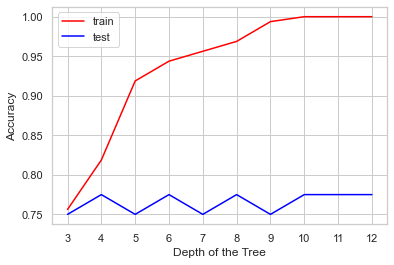

In [223]:
# Here we will compare the accuracy score with both the train and test set
# The max_depth range will be 3 to 13
from matplotlib import pyplot as plt
tr=[]
te=[]
for i in range(3,13):
        clf=DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=i)
        clf=clf.fit(x_train,y_train)

        score_tr=clf.score(x_train,y_train)
        score_te=clf.score(x_test,y_test)

        tr.append(score_tr)
        te.append(score_te)
print("Max accuracy score against train set: ", max(tr))
print("Max accuracy score against test set: ",max(te))

plt.plot(range(3,13),tr,color="red",label="train")
plt.plot(range(3,13),te,color="blue",label="test")
plt.xlabel("Depth of the Tree")
plt.ylabel("Accuracy")
plt.xticks(range(3,13))
plt.legend()
plt.show()

    Mortgage  Recommended risk level
0  -1.773115                0.807270
1   1.213182                0.163508
2   0.305843               -1.805332
3   0.362653               -0.526485
4   1.886165                0.621821
..       ...                     ...
95  0.384755               -0.778015
96  0.169525                1.245143
97 -0.318514               -1.433776
98  0.053624                0.461126
99  0.606134               -1.720041

[100 rows x 2 columns]


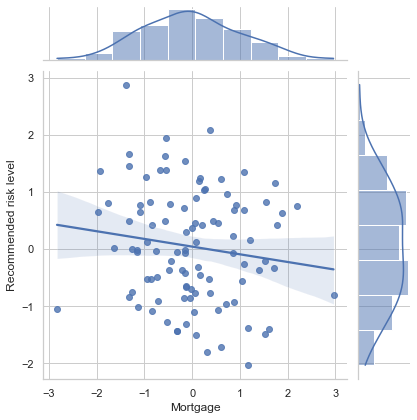

In [224]:
#Here is the relationship between Mortgage and Recommended risk level
import seaborn as sns
df = pd.DataFrame({'Mortgage':np.random.normal(size=100),
                  'Recommended risk level':np.random.normal(size=100)})
print(df)

sns.jointplot(x='Mortgage',y='Recommended risk level',data=df,kind='reg')
plt.show()


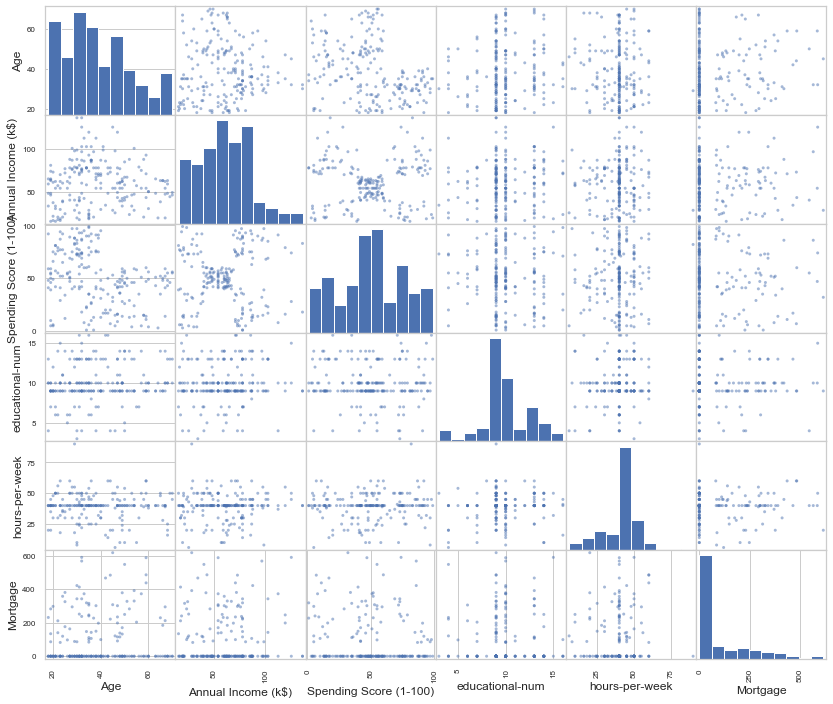

In [225]:
#Here is the relationship between the features I used
from pandas.plotting import scatter_matrix
attributes = ["Age","Annual Income (k$)","Spending Score (1-100)","educational-num","hours-per-week","Mortgage"]
scatter_matrix(customer[attributes], figsize=(14,12))
plt.show()